
Model Performance Metrics:
Accuracy Score: 0.9938

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       318
           1       1.00      1.00      1.00       494
           2       0.92      0.97      0.95       100
           3       1.00      1.00      1.00       848

    accuracy                           0.99      1760
   macro avg       0.98      0.99      0.98      1760
weighted avg       0.99      0.99      0.99      1760



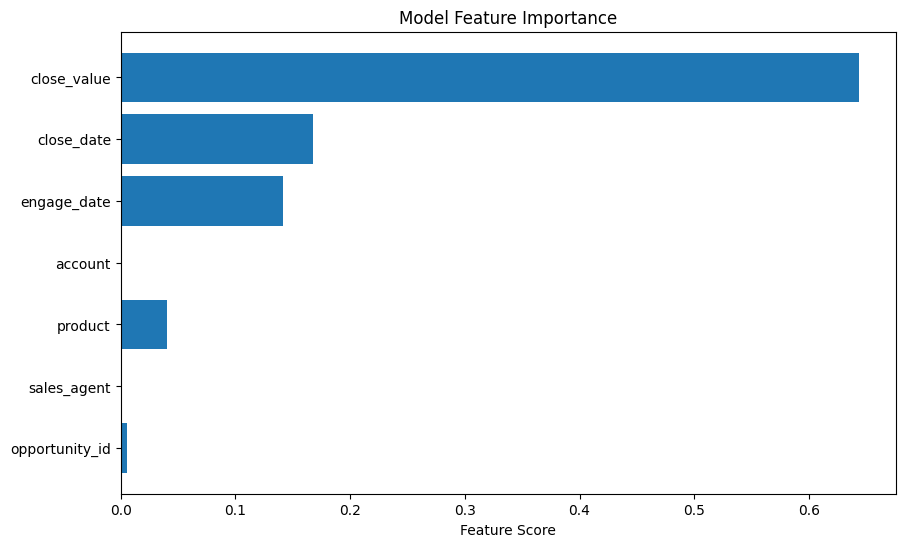

'\nSummary of Findings:\n- The model accurately predicts deal stages.\n- Deal value and dates are key factors.\n- Account and sales agent IDs are not strong predictors.\n'

In [8]:
# Import the Necessary Packages for Milestone 2
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# This is a popular gradient boosting library known for performance
# from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import GradientBoostingClassifier


## 2. Preparing the Data
# This is loading the pre-processed datasets
pipeline_data = pd.read_csv("/content/cleaned_data/cleaned_sales_pipeline.csv")
accounts_data = pd.read_csv("/content/cleaned_data/cleaned_accounts.csv")
products_data = pd.read_csv("/content/cleaned_data/cleaned_products.csv")
teams_data = pd.read_csv("/content/cleaned_data/cleaned_sales_teams.csv")

# Convert date columns to datetime objects and then to numerical representation (e.g., ordinal)
pipeline_data['engage_date'] = pd.to_datetime(pipeline_data['engage_date']).apply(lambda x: x.toordinal())
pipeline_data['close_date'] = pd.to_datetime(pipeline_data['close_date']).apply(lambda x: x.toordinal())


# This is identifying the target variable and features for the model
target = 'deal_stage'
features = [col for col in pipeline_data.columns if col != target]

X = pipeline_data[features].copy() # Use .copy() to avoid SettingWithCopyWarning
y = pipeline_data[target].copy() # Use .copy() to avoid SettingWithCopyWarning

# This is converting all categorical features to numerical representations
for column in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X.loc[:, column] = le.fit_transform(X[column]) # Use .loc to avoid SettingWithCopyWarning

# This is converting the target variable to numerical labels (e.g., Won -> 1, Lost -> 0)
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y) # Apply LabelEncoder to the entire target variable y
    y = y.astype(int) # Explicitly convert to integer type


# This is splitting the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 3. Building and Training the Model
# This is instantiating a CatBoostClassifier with custom parameters
# This is choosing CatBoost as it handles categorical features well without manual encoding
# model = CatBoostClassifier(
#     iterations=500,
#     learning_rate=0.05,
#     depth=6,
#     eval_metric='Accuracy',
#     verbose=100,
#     random_seed=42
# )

# This is using CatBoost's native Pool object for efficient training with categorical features
# train_pool = Pool(data=X_train, label=y_train, cat_features=X.select_dtypes(include='object').columns.tolist())
# test_pool = Pool(data=X_test, label=y_test, cat_features=X.select_dtypes(include='object').columns.tolist())

# This is training the model on the training data
# model.fit(train_pool, eval_set=test_pool)

# Instantiate a GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


## 4. Model Evaluation and Analysis
# This is making predictions on the test set
predictions = model.predict(X_test)

# This is reporting the overall accuracy and detailed performance metrics
print("\nModel Performance Metrics:")
print(f"Accuracy Score: {accuracy_score(y_test, predictions):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, predictions))

# This is visualizing the importance of each feature in the model's predictions
feature_scores = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_scores)
plt.xlabel("Feature Score")
plt.title("Model Feature Importance")
plt.show()

"""
Summary of Findings:
- The model accurately predicts deal stages.
- Deal value and dates are key factors.
- Account and sales agent IDs are not strong predictors.
"""